# 데이터 전처리

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic') # 차트에 한글 글자 깨짐 방지

pd.read_csv('../../data/public_bike/서울특별시 공공자전거 대여정보_201906_1.csv', encoding='cp949')

# 데이터 부르기
bikes = pd.DataFrame()
for i in range(3):
    bikes_temp = pd.read_csv(f'../../data/public_bike/서울특별시 공공자전거 대여정보_201906_{i+1}.csv', encoding='cp949', parse_dates=['대여일시'])
    bikes=pd.concat([bikes, bikes_temp])
    
# 누락값 검사
bikes.isnull().sum()

# 파생변수, '요일', '일자', '대여시간대', '주말구분'
요일 = ['월','화','수','목','금','토','일']
요일순서 = ['월','화','수','목','금','토','일']
bikes['요일'] = bikes['대여일시'].dt.day_of_week.apply(lambda x : 요일[x])
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes['일자'] = bikes['대여일시'].dt.day
bikes['주말구분'] = bikes['대여일시'].dt.day_of_week.apply(lambda x: '평일' if x < 5 else '주말')

# 위도, 경도 파일 Merge
bike_shop = pd.read_csv('../../data/public_bike/공공자전거 대여소 정보(23.06월 기준).csv', encoding='euc-kr')
bikes_gu = bike_shop[['자치구', '대여소 번호', '보관소(대여소)명', '위도', '경도']]
bikes_gu = bikes_gu.rename(columns={'보관소(대여소)명':'대여소명', '대여소 번호' : '대여소번호'})
bikes = pd.merge(bikes, bikes_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes = bikes.rename(columns={'자치구':'대여구','위도' : '대여점위도','경도' : '대여점경도'})

<Axes: xlabel='요일', ylabel='count'>

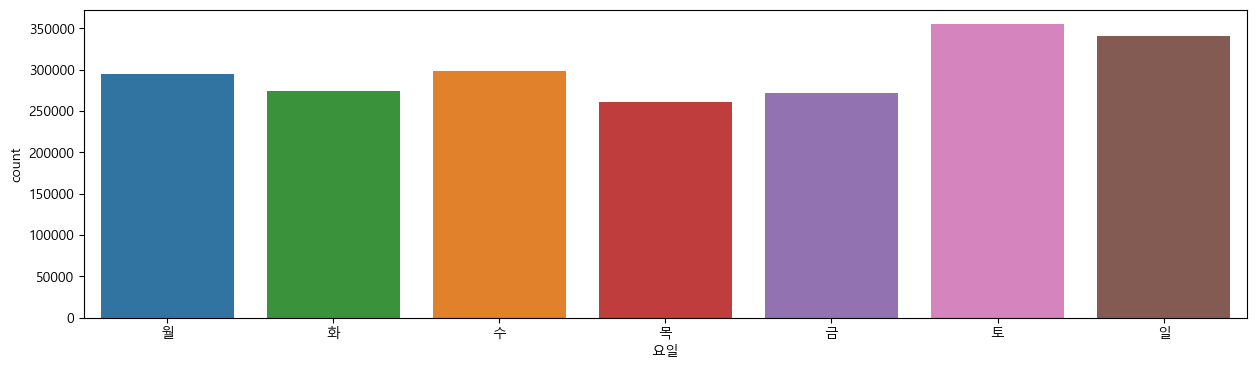

In [8]:
# 시간 개념에 따른 데이터 분석
# 1. 일자별 따릉이 이용건수, 요일별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='요일', order=['월','화','수','목','금','토','일'], hue='요일')

<Axes: xlabel='일자', ylabel='count'>

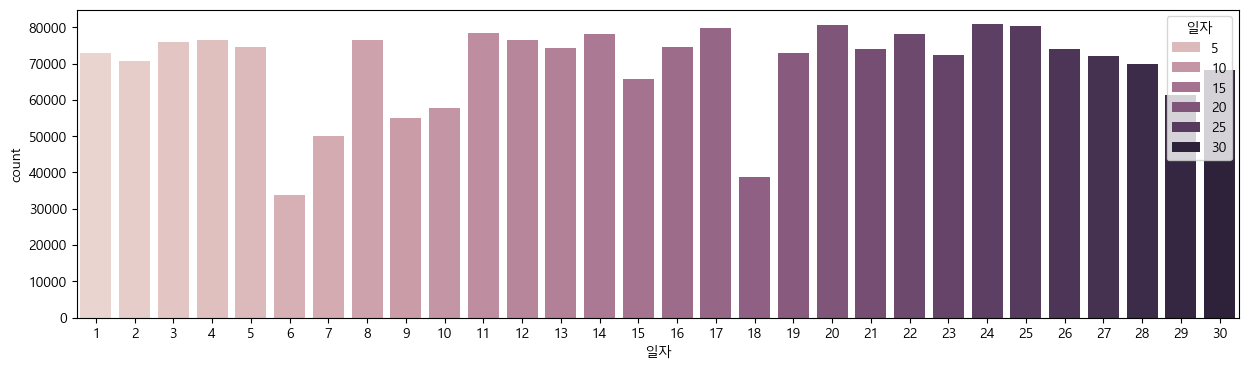

In [9]:
# 2. 일자별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자', hue='일자')

<Axes: xlabel='대여시간대', ylabel='count'>

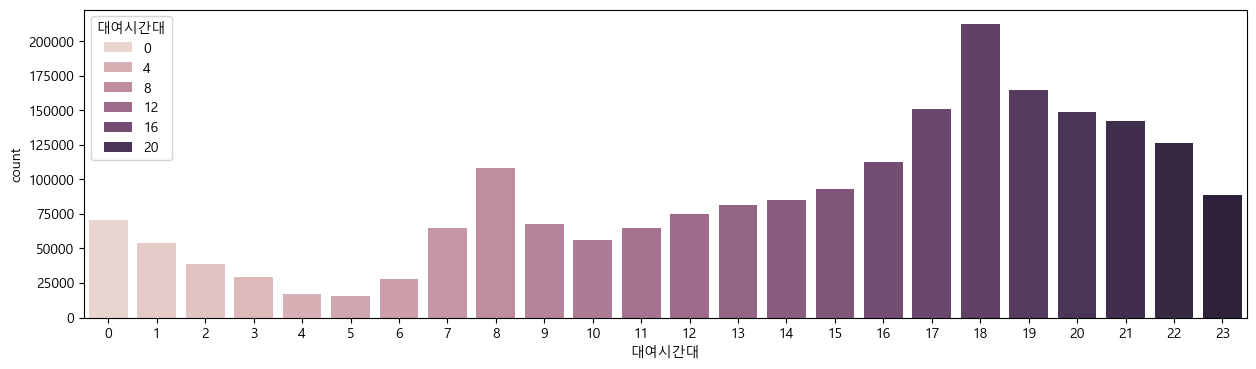

In [10]:
# 3. 대여시간대별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='대여시간대')

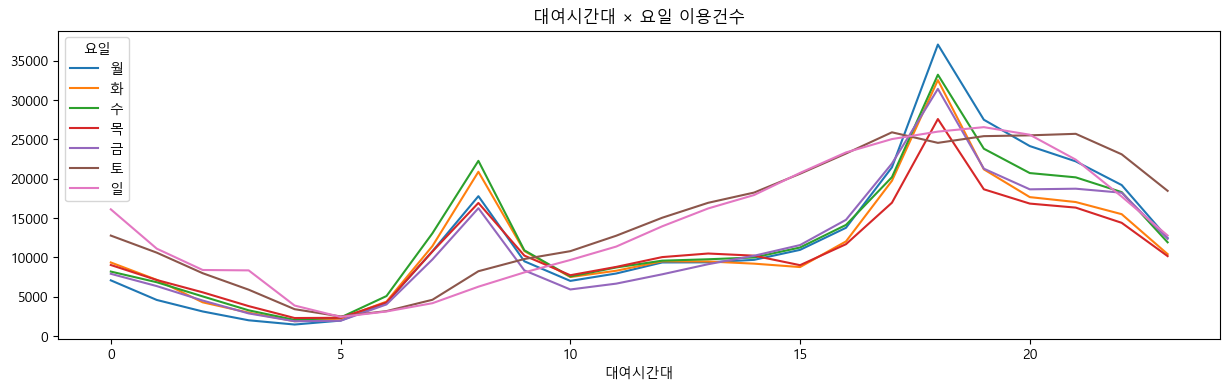

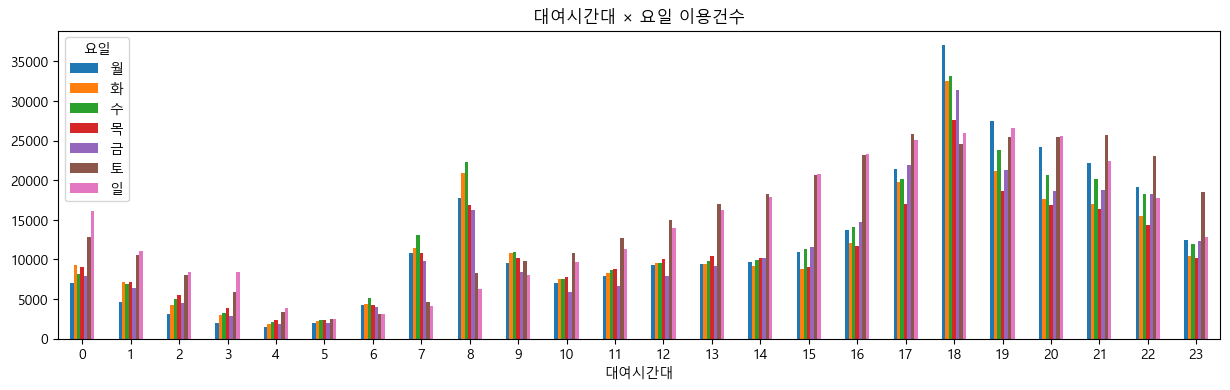

<Axes: xlabel='요일', ylabel='대여시간대'>

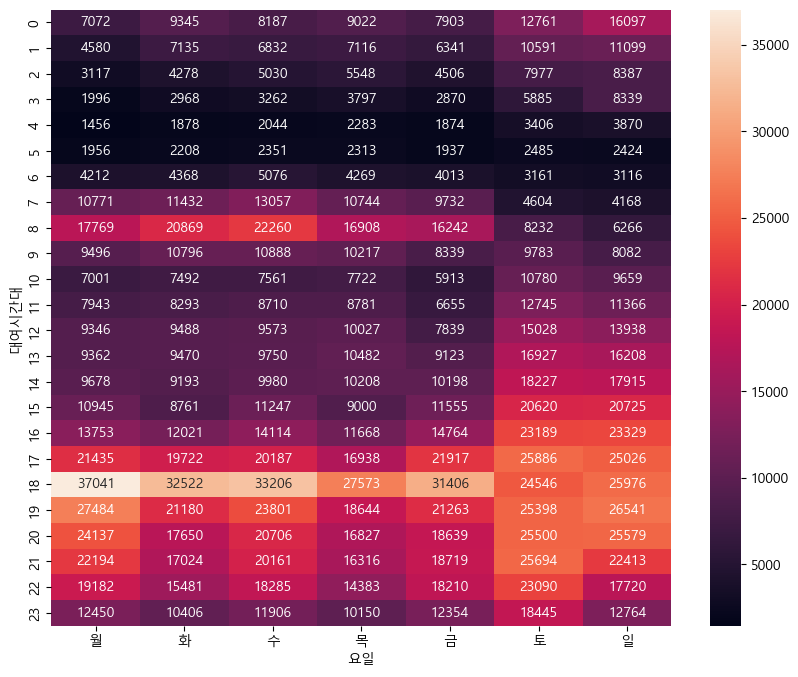

In [12]:
# 4. 대여시간대 & 요일 따릉이 이용건수
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대',columns='요일',values='자전거번호',aggfunc='count').reindex(요일순서, axis=1)
hourly_dayofweek_ride.plot(kind='line',title='대여시간대 × 요일 이용건수',figsize=(15,4))
plt.show()
hourly_dayofweek_ride.plot(kind='bar',title='대여시간대 × 요일 이용건수',figsize=(15,4),rot=0)
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')

<Axes: xlabel='대여시간대'>

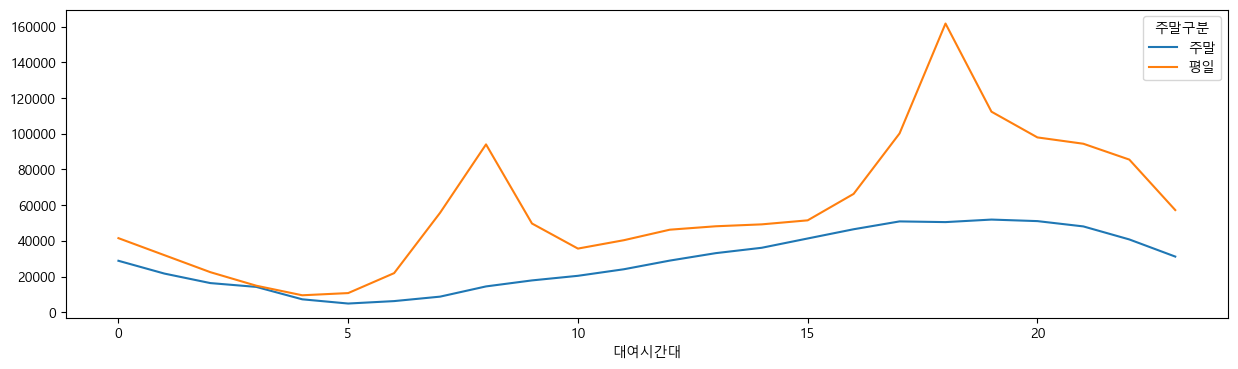

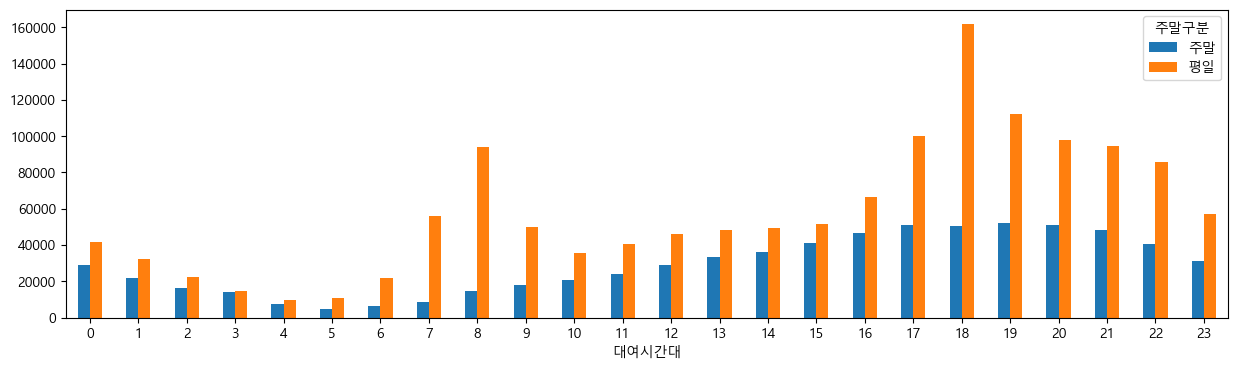

In [16]:
# 5. 대여시간대 & 주말구분 따릉이 이용건수
weekedays_hourly_ride = bikes.pivot_table(index='대여시간대',columns='주말구분',values='자전거번호',aggfunc='count')
weekedays_hourly_ride.plot(kind='line',figsize=(15,4))
weekedays_hourly_ride.plot(kind='bar',figsize=(15,4),rot=0)

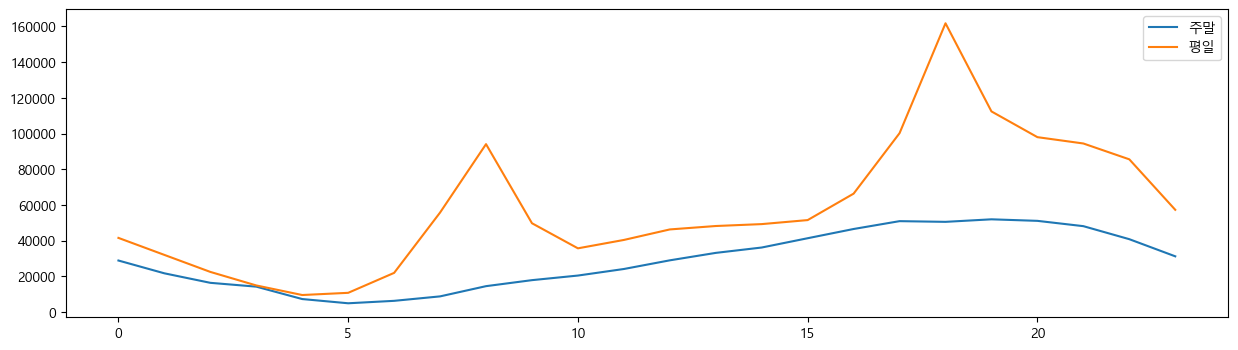

In [17]:
# matplotlib 이용
plt.figure(figsize=(15,4))
plt.plot(weekedays_hourly_ride.index, weekedays_hourly_ride['주말'],label='주말')
plt.plot(weekedays_hourly_ride.index, weekedays_hourly_ride['평일'],label='평일')
plt.legend()
plt.show()

<Axes: xlabel='대여시간대', ylabel='이용시간'>

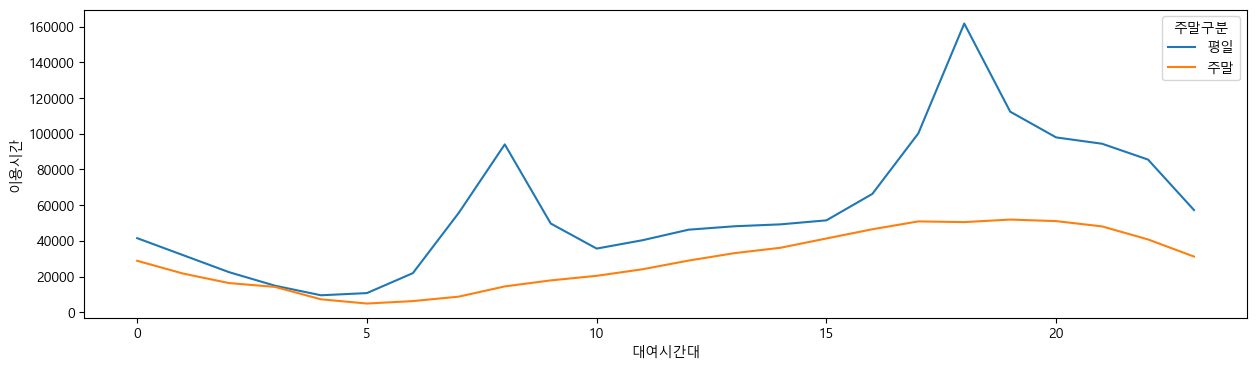

In [27]:
# seaborn 이용
plt.figure(figsize=(15,4))
sns.lineplot(data=bikes, x='대여시간대', y='이용시간',hue='주말구분',estimator='count',errorbar=None)

<Axes: xlabel='대여시간대', ylabel='count'>

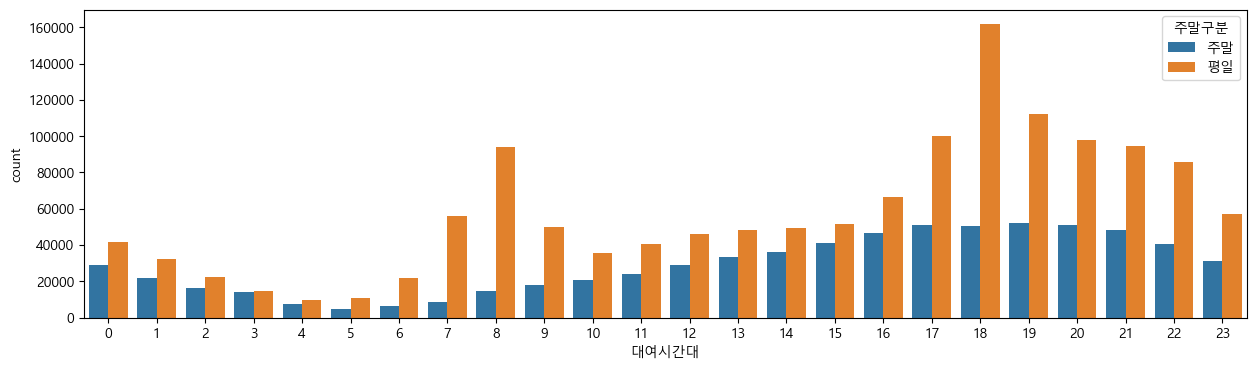

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='주말구분')